
# Salary Predictions Based on Job Descriptions

### The Problem/Goal 

The goal in this study is to gain a better undestanding of trends in salaries and based on these trends be able to predict salaries based on a variety of characteristics for particular job Ids. Understanding how to accurately predict salaries based on an individuals characteristics can provide employeers with valuable insight on paying the employees what they are worth based on education, major, job title, experience, etc. can keep them happy and away from competitors.

In [1]:
#import your 
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

#your info here
__author__ = "Jared Bonilla"
__email__ = "jbonilla7394@gmail.com"

In [2]:
#load the data into a Pandas dataframe
train_sals = pd.read_csv('train_salaries.csv')
train_feats = pd.read_csv('train_features.csv')
test_feats = pd.read_csv('test_features.csv')

In [3]:
print(train_feats.info())
print('/n')
print(test_feats.info())
print('/n')
print(train_sals.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
dtypes: int64(2), object(6)
memory usage: 61.0+ MB
None
/n
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropol

In [4]:
train_feats.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [5]:
test_feats.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [6]:
train_sals.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [7]:
df = pd.merge(train_feats,train_sals,on='jobId')
df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [8]:
df.describe(include=[np.number])

,yearsExperience,milesFromMetropolis,salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


Realize min salary is 0 raises some questions. This will require try to gain a basic understanding of the each column and what their salaries average around then check 0 salaries and see if it was a mistake and we should recompute those values or or remove them.

In [9]:
def group_mean(col):
    return df.groupby(col)['salary'].mean().sort_values(ascending=False)

In [10]:
group_mean('jobType')

jobType
CEO               145.311425
CTO               135.479983
CFO               135.458547
VICE_PRESIDENT    125.367629
MANAGER           115.367596
SENIOR            105.487775
JUNIOR             95.331557
JANITOR            70.813045
Name: salary, dtype: float64

In [11]:
group_mean('major')

major
ENGINEERING    138.436617
BUSINESS       135.648980
MATH           133.319735
COMPSCI        132.075605
PHYSICS        130.372436
CHEMISTRY      129.072085
BIOLOGY        127.932664
LITERATURE     124.423097
NONE           102.583479
Name: salary, dtype: float64

In [12]:
group_mean('degree')

degree
DOCTORAL       135.489433
MASTERS        130.504903
BACHELORS      125.454663
HIGH_SCHOOL    101.920654
NONE            98.176467
Name: salary, dtype: float64

In [13]:
group_mean('industry')

industry
OIL          130.952946
FINANCE      130.746743
WEB          121.644512
HEALTH       115.735540
AUTO         109.433690
SERVICE      104.446820
EDUCATION     99.448386
Name: salary, dtype: float64

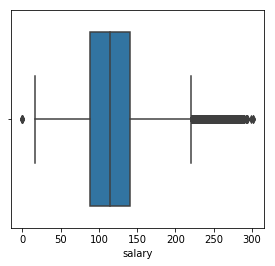

In [14]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(df.salary)

After examining the average salaries for each category, its necessary to check all salaries see where they went to fall and look for potential outliers. The majority of salaries fall around 100-150K. The higher end reaches 300k while lower end is around 0, with the minimum 0 as well definitely need to check out these outliers. With that being the majority of the salary information gathered from understanding the mean based on each category logically makes sense. Here we saw the more profitable industries and majors that tend to lead with to these industries as well as higher level of education and job type tend to have higher salaries, which was to be expected. 

In [15]:
def outlier_detector(col):
    q3= df[col].describe().at['75%']
    q1= df[col].describe().at['25%']
    iqr = q3-q1
    high_outlie = q3+1.5*iqr
    low = q1-1.5*iqr
    print('The higher end of outliers are around {} and the lower end of outliers are around {}'.format(high_outlie,low))

In [16]:
outlier_detector('salary')

The higher end of outliers are around 220.5 and the lower end of outliers are around 8.5


In [17]:
df[df.salary<=8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [18]:
df.loc[df.salary>=220.5,'jobType'].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

In [19]:
df[(df.jobType=='JUNIOR')&(df.salary>=220.5)]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


In [20]:
no_sense = df[df.salary<=8.5].index
df.drop(no_sense,inplace=True)

After finding the outliers we learned the upper end of the outliers is around 220k and above while the lower end is around 8k and lower. This required further analysis, the upper end of the outliers seemed reasonable as we learned based on the mean from each category, that certain industries, majors,job types and educational levels tend to correlate with higher salaries. The only question posed by these outliers was that some job titles included "JUNIOR" job type which was not among the higher salaries. After analyzing these JUNIOR job types with salaries around 200k we learned that accompanied by the industry, major educational level and years of experience this information seemed reasonable as well. On the lower end we found that all salaries were 0k, with features that either tended to correlate with high salaries, allowing us to assume that this was either a form of missing or improperly computed data. Although some of the jobIds with salaries of 0 associated with higher salaries, most of the unique Ids varied among other characteristics, making it a risky assumption to try and compute and replace the value as it could create some faulty information. Instead we will drop these rows.

In [21]:
def cat_col_plotter(df,col,target):
    sns.boxplot(x=col,y=target,data=df)
    
    plt.xticks(rotation=45)
    plt.ylabel('Salaries')
    plt.show()

Further visual analysis of each category reinforced information previously learned by computing the mean for each categorys salary. It's now understood that not only the average salary, but the vast majority of salaries as well increased or decreased based on job type, industry, major, educational level, years of experience and miles from metropolis. This information provided us with valuable insight that these categories do infact correlate with salary.

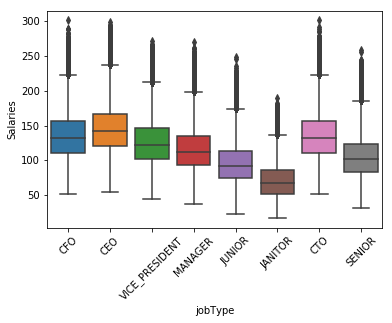

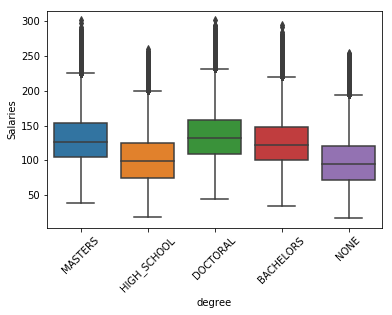

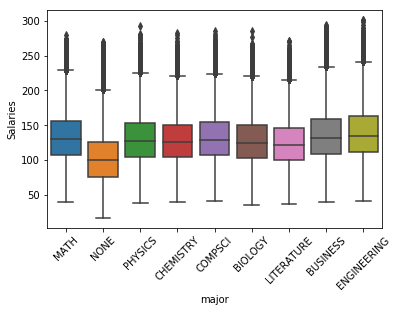

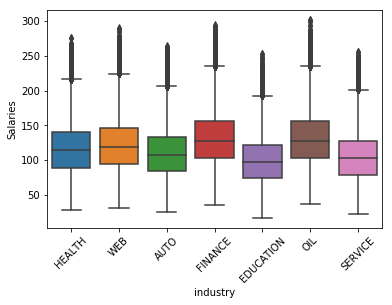

In [22]:
cols = ['jobType','degree','major','industry']
for i in cols:
    cat_col_plotter(df,i,'salary')

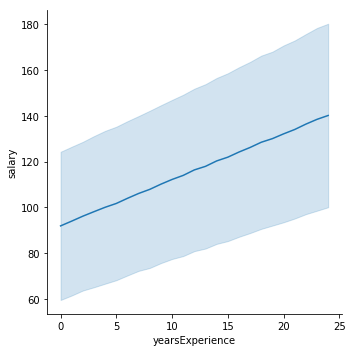

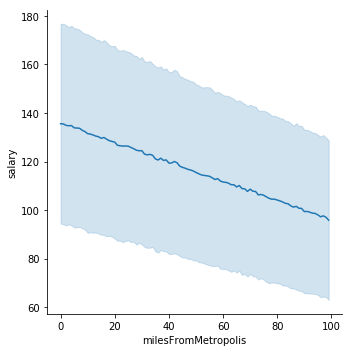

In [23]:
num_cols = ['yearsExperience','milesFromMetropolis']
def num_col_plotter(df,col,target):
    sns.relplot(x=col,y=target,ci='sd', kind='line',data=df)

for col in num_cols:
    num_col_plotter(df,col,'salary')

In [24]:
#df2=df.copy()
for col in cols:
    col_mean = df.groupby(col)['salary'].mean()
    col_df = pd.DataFrame(data=col_mean)
    mean_sal = {'salary':'mean_salary_'+col}
    col_df.rename(mean_sal,axis=1,inplace=True)
    col_df = col_df.reset_index()
    df = pd.merge(df,col_df,how='left')
    test_feats = pd.merge(test_feats,col_df,how='left')

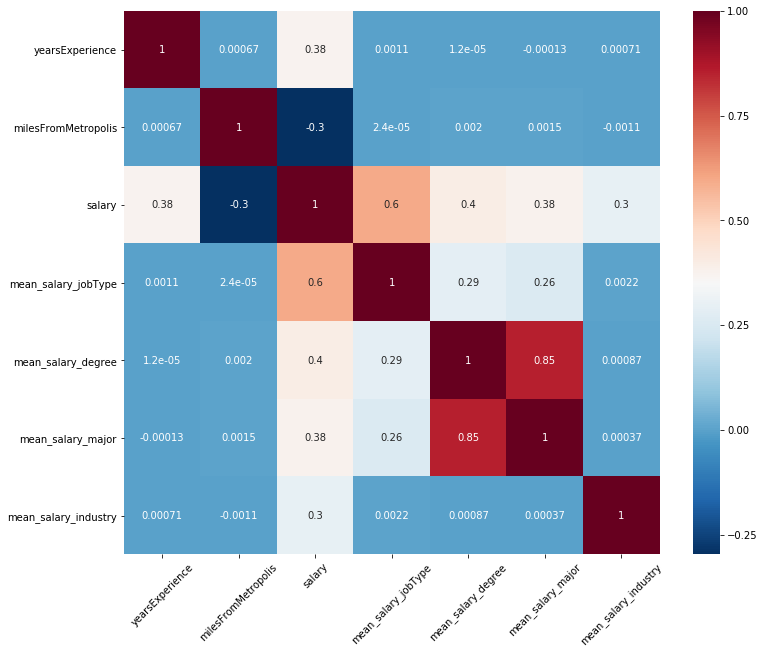

In [25]:
fig = plt.figure(figsize=(12, 10))
features = df._get_numeric_data()
sns.heatmap(features.corr(), cmap='RdBu_r', annot=True)
plt.xticks(rotation=45)
plt.show()

In [27]:
test_feats.head(1)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,mean_salary_jobType,mean_salary_degree,mean_salary_major,mean_salary_industry
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73,115.368518,101.921085,102.583864,115.73554


### Establish Baseline

Since there seems to be a linear relationship between salary and its neighboring categories and distinct correlations, it seems logical to use a linear regression as a baseline model for this study. With that being said, mean squared error would be a good metric to use for this problem, as minimizing the difference between the predict value and actual value would improve our results and end goal.

### Hypothesis

Due to the fact that the relationship is linear it could be beneficial to also use a Random Forest as well as Gradient Boosting. After generating the mean for each categorical feature, and then one hot encoding all of these categories there will be a relatively large number of features and Random Forest is a model that deals well with a variety of features. Since Gradient Boosting is an ensemble method that oppose to Random Forest learns from the previous trees, this model could preform better than the prior. 

In [28]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [29]:
to_drop = ['jobId','companyId']
df.drop(to_drop,axis=1,inplace=True)
test_feats.drop(to_drop,axis=1,inplace=True)
df.head(1)

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,mean_salary_jobType,mean_salary_degree,mean_salary_major,mean_salary_industry
0,CFO,MASTERS,MATH,HEALTH,10,83,130,135.458547,130.505647,133.322042,115.73554


In [30]:
df = pd.get_dummies(df)
test = pd.get_dummies(test_feats)
df.head(1)

,yearsExperience,milesFromMetropolis,salary,mean_salary_jobType,mean_salary_degree,mean_salary_major,mean_salary_industry,jobType_CEO,jobType_CFO,jobType_CTO,...,major_MATH,major_NONE,major_PHYSICS,industry_AUTO,industry_EDUCATION,industry_FINANCE,industry_HEALTH,industry_OIL,industry_SERVICE,industry_WEB
0,10,83,130,135.458547,130.505647,133.322042,115.73554,0,1,0,...,1,0,0,0,0,0,1,0,0,0


In [31]:
x = df.drop('salary',axis=1)
y= df.salary

In [32]:
num_procs = 2
verbose_lvl =5
lr = LinearRegression()
rfr = RandomForestRegressor(n_estimators=150, n_jobs=num_procs, max_depth=25, min_samples_split=80, \
                            max_features=30, verbose=verbose_lvl)
gbm = GradientBoostingRegressor(n_estimators=150,max_depth=5,loss='ls',verbose=verbose_lvl)

In [33]:
models = [lr,rfr,gbm]
mean_mse= {}
def train_models(model,features,target,num_procs,mean_mse):
    neg_mse = cross_val_score(model,features,target,cv=2,n_jobs=num_procs,scoring='neg_mean_squared_error')
    mean_mse[model]=-1.0*np.mean(neg_mse)

In [34]:
def print_model_results(model,mean_mse):
    print('\nModel: \n',model)
    print('Mean Squared Error:\n ',mean_mse[model])

In [35]:
for model in models:
    train_models(model,x,y,num_procs,mean_mse)
    print_model_results(model,mean_mse)


Model: 
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
Mean Squared Error:
  384.43161281594126

Model: 
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
           max_features=30, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=80, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=2, oob_score=False, random_state=None,
           verbose=5, warm_start=False)
Mean Squared Error:
  365.7002962359653

Model: 
 GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=150, n_iter_no_change=None, presort='auto',
             random

In [36]:
#Train model on entire dataset
gbm.fit(x,y)

preds = gbm.predict(test)

      Iter       Train Loss   Remaining Time 
         1        1325.3250           20.26m
         2        1182.8030           19.96m
         3        1061.8355           19.80m
         4         963.6307           19.54m
         5         879.3636           19.44m
         6         810.2950           19.28m
         7         751.2314           19.14m
         8         699.7277           18.98m
         9         657.1792           18.89m
        10         620.8690           18.79m
        11         588.5642           18.78m
        12         561.7357           18.67m
        13         537.8290           18.56m
        14         517.3726           18.37m
        15         499.5271           18.26m
        16         484.3678           18.14m
        17         470.5134           18.01m
        18         458.7610           17.84m
        19         448.0286           17.66m
        20         439.0979           17.51m
        21         430.9475           17.36m
        2

<BarContainer object of 6 artists>

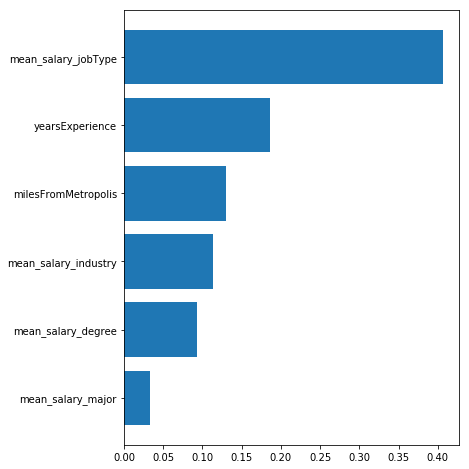

In [38]:
df_feat_importances_gbm = pd.DataFrame(list(zip(x,gbm.feature_importances_)), columns=['Feature','Importance']).head(6)
df_feat_importances_gbm.sort_values(by='Importance', inplace=True)
plt.figure(figsize=[6,8])
plt.barh(df_feat_importances_gbm['Feature'],df_feat_importances_gbm['Importance'])

Based on the features of importance from the Gradient Boosting Regressor, our model that had the lowest mean squared error, its clear that job type, years of experience and distance from Metropolis are key indicators of salary. The mean salary for each category played a very important role on what employees are paid as they tended to reflect that category as whole . These can give employeers a good indication of how they should pay prospective employees in comparison to a given employees job type, major, educational level, years experience and miles from Metropolis.